In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
train_data = pd.read_csv(r'C:\Users\Armaan\Downloads\P16-Recurrent-Neural-Networks\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv')

In [14]:
train_data.describe

<bound method NDFrame.describe of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]>

In [24]:
train_set = train_data.iloc[:, 1:2].values
train_set.shape

(1258, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_scaled = sc.fit_transform(train_set)

In [13]:
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [16]:
X_train = []
y_train = []
for i in range(70,1258):
    X_train.append(train_scaled[i-70:i, 0])
    y_train.append(train_scaled[i ,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [25]:
X_train.shape

(1188, 70, 1)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

predictor = Sequential()
predictor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
predictor.add(Dropout(0.2))
predictor.add(LSTM(units = 50, return_sequences = True))
predictor.add(Dropout(0.2))
predictor.add(LSTM(units = 50, return_sequences = True))
predictor.add(Dropout(0.2))
predictor.add(LSTM(units = 50))
predictor.add(Dropout(0.2))
predictor.add(Dense(units = 1))

In [22]:
predictor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
predictor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0361
Epoch 2/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0038
Epoch 13/100
38/38 [=====

In [3]:
test_data = pd.read_csv(r'C:\Users\Armaan\Downloads\P16-Recurrent-Neural-Networks\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv')
test_data

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


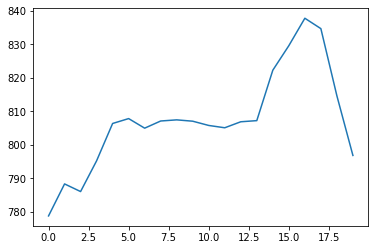

In [31]:
test_set = test_data.iloc[:, 1:2].values
plt.plot(test_set)

In [38]:
final_data = pd.concat((train_data['Open'],test_data['Open']), axis = 0)
inputs = final_data[len(train_data) - 70:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(70, 90):
    X_test.append(inputs[i-70:i, 0])
X_test = np.array(X_test) 

In [39]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [40]:
predicted_ans = predictor.predict(X_test)
predicted_ans = sc.inverse_transform(predicted_ans)

In [41]:
print(predicted_ans)

[[775.0654 ]
 [772.43634]
 [772.8801 ]
 [774.46155]
 [778.00073]
 [784.08545]
 [789.5756 ]
 [791.7272 ]
 [791.92706]
 [791.47266]
 [790.97046]
 [790.44293]
 [790.0273 ]
 [790.3952 ]
 [791.26074]
 [795.9268 ]
 [802.9342 ]
 [810.3893 ]
 [814.25525]
 [809.698  ]]


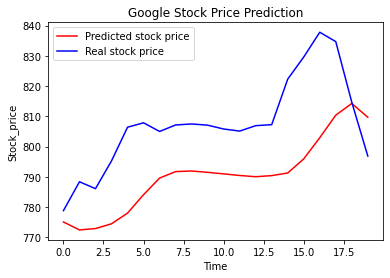

In [43]:
plt.plot(predicted_ans, color = 'red', label = 'Predicted stock price')
plt.plot(test_set, color = 'blue', label = 'Real stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock_price')
plt.legend()
plt.show()